# **Git demo**

### **Simple git pipeline**

Let's create new directory for our pet repo

In [24]:
! git config --global user.name "Mikhail Akhtyrchenko"
! git config --global user.email "dont.ask@email.com"

This uses an empty pre-created private repository that you will not have access to, to create your own one see “how_to_create_repo.md” instructions

In [25]:
! git clone git@github.com:EnriFermi/seminar-1-example.git
%cd 'seminar-1-example'

Cloning into 'seminar-1-example'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5 (delta 0), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.
/Users/dirak/.Trash/seminar-1-example/seminar-1-example


/Users/dirak/anaconda3/envs/nlp/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [26]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [27]:
!git help

usage: git [-v | --version] [-h | --help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--no-lazy-fetch]
           [--no-optional-locks] [--no-advice] [--bare] [--git-dir=<path>]
           [--work-tree=<path>] [--namespace=<name>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   restore    Restore working tree files
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisi

Let's add new file to working dir

In [28]:
!echo "### Simple README" > README.md

Add new file to staging area

In [29]:
!git add README.md

Add everything from staging area to local history

<div class="alert alert-info">
    <b>Advise:</b> Before committing, review all changes and roll back any unnecessary changes that were made unintentionally.
</div>

In [30]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [31]:
!git commit -m "first commit"
!git log

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
commit 488c8f6968be9806b8209ce60e02d240a9f1f998 (HEAD -> master, origin/master, origin/HEAD)
Author: Mikhail Akhtyrchenko <dont.ask@email.com>
Date:   Sun Sep 7 12:22:38 2025 +0200

    first commit

commit 6c41f5c6063cd115380dcf3f3db6dc9a9796a225
Author: m.akhtyrchenko <m.ahtyrchenko@vkteam.ru>
Date:   Thu Jul 24 13:06:00 2025 +0300

    Initial clean commit


<div class="alert alert-danger">
    <b>Attention:</b> Short and uninformative commit messages are bad practice, try to make them more meaningful and informative (so that you can get a rough idea of what the commit changes are). AI can be a good tool for this purpose.
</div>

In [32]:
!git push
!git log --oneline --graph --all --decorate

Everything up-to-date
* 488c8f6 (HEAD -> master, origin/master, origin/HEAD) first commit
* 6c41f5c Initial clean commit


### **How merge works**

In [33]:
!git checkout -b branch_1

Switched to a new branch 'branch_1'


In [34]:
!echo "branch_1" > branch_1.txt
!echo " added by branch_1" >> README.md
!git add branch_1.txt README.md
!git commit -m "branch_1"

[branch_1 b4356fc] branch_1
 2 files changed, 2 insertions(+)
 create mode 100644 branch_1.txt


In [35]:
!git checkout -b branch_2 master
!cat README.md
!ls # we can check, that "branch_1.txt" disapeared, because we created branch_2 from master, where there is no "branch_1.tst"

Switched to a new branch 'branch_2'
### Simple README
README.md


In [36]:
!echo "branch_2" > branch_2.txt
!echo " added by branch_2" >> README.md
!git add branch_2.txt README.md
!git commit -m "branch_2"
!cat README.md
!ls 

[branch_2 1f41b3e] branch_2
 2 files changed, 2 insertions(+)
 create mode 100644 branch_2.txt
### Simple README
 added by branch_2
README.md    branch_2.txt


In [37]:
!git log --oneline --graph --all --decorate

* 1f41b3e (HEAD -> branch_2) branch_2
| * b4356fc (branch_1) branch_1
|/  
* 488c8f6 (origin/master, origin/HEAD, master) first commit
* 6c41f5c Initial clean commit


In [38]:
!git merge branch_1

Auto-merging README.md
CONFLICT (content): Merge conflict in README.md
Automatic merge failed; fix conflicts and then commit the result.


**We need to resolve conflict**

In [39]:
! git add README.md
! git commit -m "Merge branch_1 into branch_2"

[branch_2 7099e2c] Merge branch_1 into branch_2


In [40]:
!git checkout master
!git merge branch_2

Switched to branch 'master'
Your branch is up to date with 'origin/master'.
Updating 488c8f6..7099e2c
Fast-forward
 README.md    | 5 +++++
 branch_1.txt | 1 +
 branch_2.txt | 1 +
 3 files changed, 7 insertions(+)
 create mode 100644 branch_1.txt
 create mode 100644 branch_2.txt


In [41]:
!git log --oneline --graph --all --decorate

*   7099e2c (HEAD -> master, branch_2) Merge branch_1 into branch_2
|\  
| * b4356fc (branch_1) branch_1
* | 1f41b3e branch_2
|/  
* 488c8f6 (origin/master, origin/HEAD) first commit
* 6c41f5c Initial clean commit


In [42]:
!git push 

Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 8 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (11/11), 955 bytes | 955.00 KiB/s, done.
Total 11 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (1/1), done.
To github.com:EnriFermi/seminar-1-example.git
   488c8f6..7099e2c  master -> master


In [59]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


Now suppose we have a file that we don't want to add to the git repository, but it is necessary for our code to run on our computer (e.g. python cache)

In [ ]:
! echo "Some text which shouldn't be added to git" > local
! echo "Some text which should be added to git" > togit
! git add --all

In [64]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   local
	new file:   togit



In [65]:
! git reset local

In [66]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   togit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	local



In [67]:
! echo "local" > .gitignore

As we can see local file became invisible for git

In [69]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   togit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore



In [70]:
! git add --all
! git commit -m "add .gitignore and togit"

[master 9a799a5] add .gitignore and togit
 2 files changed, 2 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 togit


<div class="alert alert-danger">
    <b>Attention:</b> Do not commit files specific to your computer, such as temporary files, caches and logs etc. You should use .gitignore for such cases
</div>

**More about git and how to use it**
* Pro Git Book https://git-scm.com/book/en/v2
* https://ohmygit.org/
* https://learngitbranching.js.org/

### **Python packages**

### **Python Environments**

**ATTENTION: (this part won't work inside notebook, so run it in terminal)**

In [ ]:
! which python
! pip install numpy
! pip list | grep numpy

In [ ]:
! python -m venv new_env

In [ ]:
! echo "new_env/\n.gitignore" > .gitignore

In [ ]:
! source new_env/bin/activate
! which python

In [ ]:
! pip list | grep numpy

In [ ]:
! echo "numpy==2.3.2" > requirements.txt
! pip install -r requirements.txt

In [ ]:
! deactivate

Instead of creating env using venv and saving manually packages to 'requirements.txt' we can use **pipenv**

In [ ]:
! pip install --user pipenv

In [ ]:
! pipenv install

In [ ]:
! pipenv graph

In [ ]:
! pipenv install numpy
 # Tip: You can add the \e[31m escape code to an echo string to make the text red. 
 # Everything after that will appear red until you reset it with \e[0m.
! echo -e "\e[31m Installed packages: $(pipenv graph) \e[0m"

In [ ]:
! pipenv shell

In [ ]:
! echo "print('Hello world!')" > hello.py
! pipenv run python hello.py

# **Python**

In [ ]:
import this #Best practicies from Python creator

- interpreted (the code is executed by the interpreter, rather than compiled into an independent program)
- strict typing (different types are reduced to each other in a limited number of cases)
- dynamic typing (any variable can be associated with objects of any type)

### **Interpreter implementations**

- **CPython** (reference)
- IronPython
- Jython
- PyPy

[more detailed](https://www.python.org/download/alternatives/)

### **How to launch python**

Launch as **REPL** (read–eval–print loop) or as **IPython** (Enhanced version of REPL) in terminal  

In [ ]:
! python #REPL
! ipython #IPython

You can run the course materials as **Jupyter Notebooks** (which we are already using). Jupyter Notebooks are great for learning and data science because they let you combine live code with explanations, visualizations, and formatted text using Markdown.

Notebook files have the extension .ipynb and can be opened in IDEs like VS Code or PyCharm, or directly through a Jupyter server.

Below is the code to start a Jupyter server to launch your notebooks:


In [ ]:
! pip install notebook
! jupyter notebook

You can run any python program in a file in non-interactive mode using:

In [ ]:
! python hello.py # here after python command we specify argument, which is path to python command

## **Basic types and variables**

### **Numeric types**
In Python, variables are **not bound to a specific data type**. This means you don’t have to declare their type explicitly. Because the type is determined automatically at runtime, Python is called a **dynamically typed** language.


In [ ]:
# int
x = 1
print(type(x))

# float
x = 1.0 # we changed the type of variable
print(type(x))

#complex
x = 1j 
print(type(x))

<class 'int'>
<class 'float'>
<class 'complex'>


In [21]:
x = 10000
y = 1_00_00
z = 1e4 
h = 10000.0
print(x, y, z, h)

10000 10000 10000.0 10000.0


#### Basic Math Operations in Python

Python supports all standard arithmetic operators:

- `+` Addition → `5 + 3` → `8`  
- `-` Subtraction → `10 - 4` → `6`  
- `*` Multiplication → `7 * 6` → `42`  
- `/` Division → `8 / 2` → `4.0` <span style="color:red">(returns float)</span>  
- `//` Floor Division → `9 // 2` → `4`  
- `%` Modulus → `10 % 3` → `1`  
- `**` Exponentiation → `2 ** 3` → `8`


In [ ]:
type(4 // 2), type(4 / 2)

For each operator there is `x<operator>=<value>` notation, which is equal to `x=x<operator><value>`

In [29]:
x = 2
x **= x
x

4

#### **Integer encodings**

Given a number in base-*x* with digits:

$$
N = d_n d_{n-1} \dots d_1 d_0
$$

Each digit $d_i$ is an integer in the range $0 \leq d_i < x$, where $x$ is the base (e.g., 2, 8, 16, etc.).

Decimal value:
$$
\text{Decimal}(N) = \sum_{i=0}^{n} d_i \cdot x^i
$$

Where:

* $d_0$ is the least significant digit (rightmost)
* $d_n$ is the most significant digit (leftmost)
* $x$ is the base



Example: Convert $1011_2$ to Decimal

Binary (base 2):

$$
1011_2 = 1 \cdot 2^3 + 0 \cdot 2^2 + 1 \cdot 2^1 + 1 \cdot 2^0 = 8 + 0 + 2 + 1 = 11_{10}
$$

In [ ]:
print(0b1011, type(0b1011)) #binary encoding
print(0o174, type(0o17)) #octal encoding (numbers from 0 to 7), 124 = 1 * 8**2 + 7 * 8**1 + 4 * 8**0 
print(0x5F, type(0x1A)) #hexadecimal encoding (characters from 0 to F) F = 15, so 95 = 5 * 16**1 + 15 * 16**0

11 <class 'int'>
124 <class 'int'>
95 <class 'int'>


Tip: in hexadecimal encoding A..F correspond to 10..15 values:
* A = 10
* B = 11
* C = 12
* D = 13 
* E = 14 
* F = 15 

### **Boolean type**

In [37]:
x, y = True, False
print(type(x), not x, not y)

<class 'bool'> False True


In [ ]:
(4 < 5, # less
4 <= 3, # less or equal
4 == 3, # equal
4 != 3, # not equal
5 > 6, # greater
5 >= 6) # greater or equal

(True, False, False, True, False, False)

In [ ]:
print(6 < 5 and 4 != 4 or 5 > 3) # it is not clear in what order the checks will be performed
assert (6 < 5 and 4 != 4 or 5 > 3) != (6 < 5 and (4 != 4 or 5 > 3)) # adding brackets changed expression output

True


<div class="alert alert-info">
    <b>Advise:</b> put parentheses in the places of the expression where the order of operations is not obvious.
</div>

In [ ]:
((6 < 5) and (4 != 4)) or (5 > 3) # this is much better!

True

You can make expressions with several operators

In [64]:
print(False == False != True)
print((False == False) != True)
#it is equivalent to
(False == False) and (False != True)

True
False


True

### **String type**

In [ ]:
hello = "'Hello'" # one line with '' inside
avocado = '"avocado"' # one line with "" inside

# several lines 
multiline = """ 
    ...
    'multi'
    "line"
    '''
    ...
"""

pineapple = '''
    ...
    'pine'
    "apple" 
    """
    ...
'''

print(hello, avocado, multiline, pineapple)
print("Length of 'Hello' string: ", len(hello)) #we can get string length
type(hello), type(multiline)   

'Hello' "avocado"  
    ...
    'multi'
    "line"
    '''
    ...
 
    ...
    'pine'
    "apple" 
    """
    ...

Length of 'Hello' string:  7


(str, str)

In [ ]:
x = (
    'Hello'
    ', world'
    '!'
)

y = '123' + \
'456' + \
'789'

z = '123' \
'456' \
'789'
print(x, y, z)

Hello, world! 123456789 123456789


<div class="alert alert-info">
    <b>Advice:</b> despite the wide variety of quotation marks, it is worth using a single string declaration style in your code for its readability
</div>

In [85]:
print("Double it" * 2) # we can duplicate strings
print("Add this " + "to this") # we can concatenate strings

Double itDouble it
Add this to this


Remember: strings in Python are immutable, so when you change string, it creates a **new** string in memory with applied changes. Too frequent creation of a new string in memory may slow down your program.

You can slice your string to get substring

In [ ]:
string = "Hello, world!"
character = string[1]  # numeration begins from 0
print(sub_string := string[3:5]) #the right border is excluded, 
# so actually the sub_string contains 3 and 4 characters (in numeration from 0)

print(string[:5]) # [0:5] we can replace with [:5]
print(string[7:]) # [7:len(string)] we can replace with [7:]
print(string[-1]) # you can use negative indicies, so -1 means we need to get last character of the string
print(string[-5:-1]) # slices also work for negative indicies

print(string[1:5:2]) # we can specify step in our iteration over string: 
# here we will iterate from second element with step size 2 until we will reach 5th element

print(string[-1:-5:-2]) # also we can iterate backwards (slice begin and end indicies must be negative)

print(string[::-2]) # we can omit some indicies (this is equivalent to [0:len(string):-2])
print(string[::]) # returns whole string 

print('-'*30) # Tip: here's how you can create delimiter strings in the output for better readability
print(string, character, sub_string)
type(string), type(character), type(sub_string)

lo
Hello
world!
!
orld
el
!l
!lo olH
Hello, world!
------------------------------
Hello, world! e lo


(str, str, str)

<div class="alert alert-info">
    <b>Tip:</b> String slices is good replacement for iterating over a string using loops (which we'll talk about next), they make the code clearer and sometimes faster.
</div>

In [3]:
text = "one,two,three"
words = text.split(",") 
print(words)
"-".join(words) 

['one', 'two', 'three']


'one-two-three'

In [6]:
words = ["some_text"] * 100000

In [10]:
%%timeit
# Bad example
text_with_hyphen = words[0]
for word in words[1:]:
    text_with_hyphen += "-" + word

5.51 ms ± 205 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
'-'.join(words)

578 μs ± 2.44 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
# What will be printed in each line?
print("".join("abc"))
print(",".join("123"))
print("a b  c".split())

**Almost 10x faster!**

Explanation: Strings are immutable objects, so when we execute `+=' on each iteration of the loop, we create a new string with the result of concatenation, so in fact we allocate unnecessary memory. When we save strings as a list and then merge them, the merge operation does not perform unnecessary memory operations. Keep this in mind when you solve some algorithm problems with strings.

In [12]:
# You can use string formatting for inserting str() representations of other objects
name = "Alabama"
number = 90
print(f"Sweet home, {name} {number}!") # ne variant
print("Sweet {}, {} {}!".format("home", name, number)) #old variant

Sweet home, Alabama 90!
Sweet home, Alabama 90!


In [ ]:
# What will be printed in each line?
print(f"{min}!")
print(f"{1/0=}")

<built-in function min>!


In [ ]:
#There are special characters in python
print('some text \n more text') #new line
print('some text \t more text') #TAB
print('\\') #print backslash
print('\'') #print quote `'`
print("\"") #print double quote `"`
print('some text\b') #backslash

some text 
 more text
some text 	 more text
some text 
 more text


In [ ]:
from time import sleep
print('some text ')
sleep(5)
print('\r more text') # carriage return	

In [29]:
#if we don't want to use special symbols, we can use raw string
print(r"some text \n more text")
print(r"some text \\ more text")
#Tip: this is usefull, when u want to type some file path in Windows
print(r"C:\better\use\linux\it\is\more\convenient\for\developing")  
# Looks more readable, than this:
print("C:\\better\\use\\linux\\it\\is\\more\\convenient\\for\\developing")  

some text \n more text
some text \\ more text
C:\better\use\linux\it\is\more\convenient\for\developing
C:\better\use\linux\it\is\more\convenient\for\developing


### **String encoding**

Each character in memory is stored as a sequence of 0s and 1s. So there are many ways you can convert the same character into a sequence of bits. ASCII and UTF-8 are two of them.

In ASCII only 128 charachters are presented, so they are encoded with 1 byte (the highest digit is always 0)

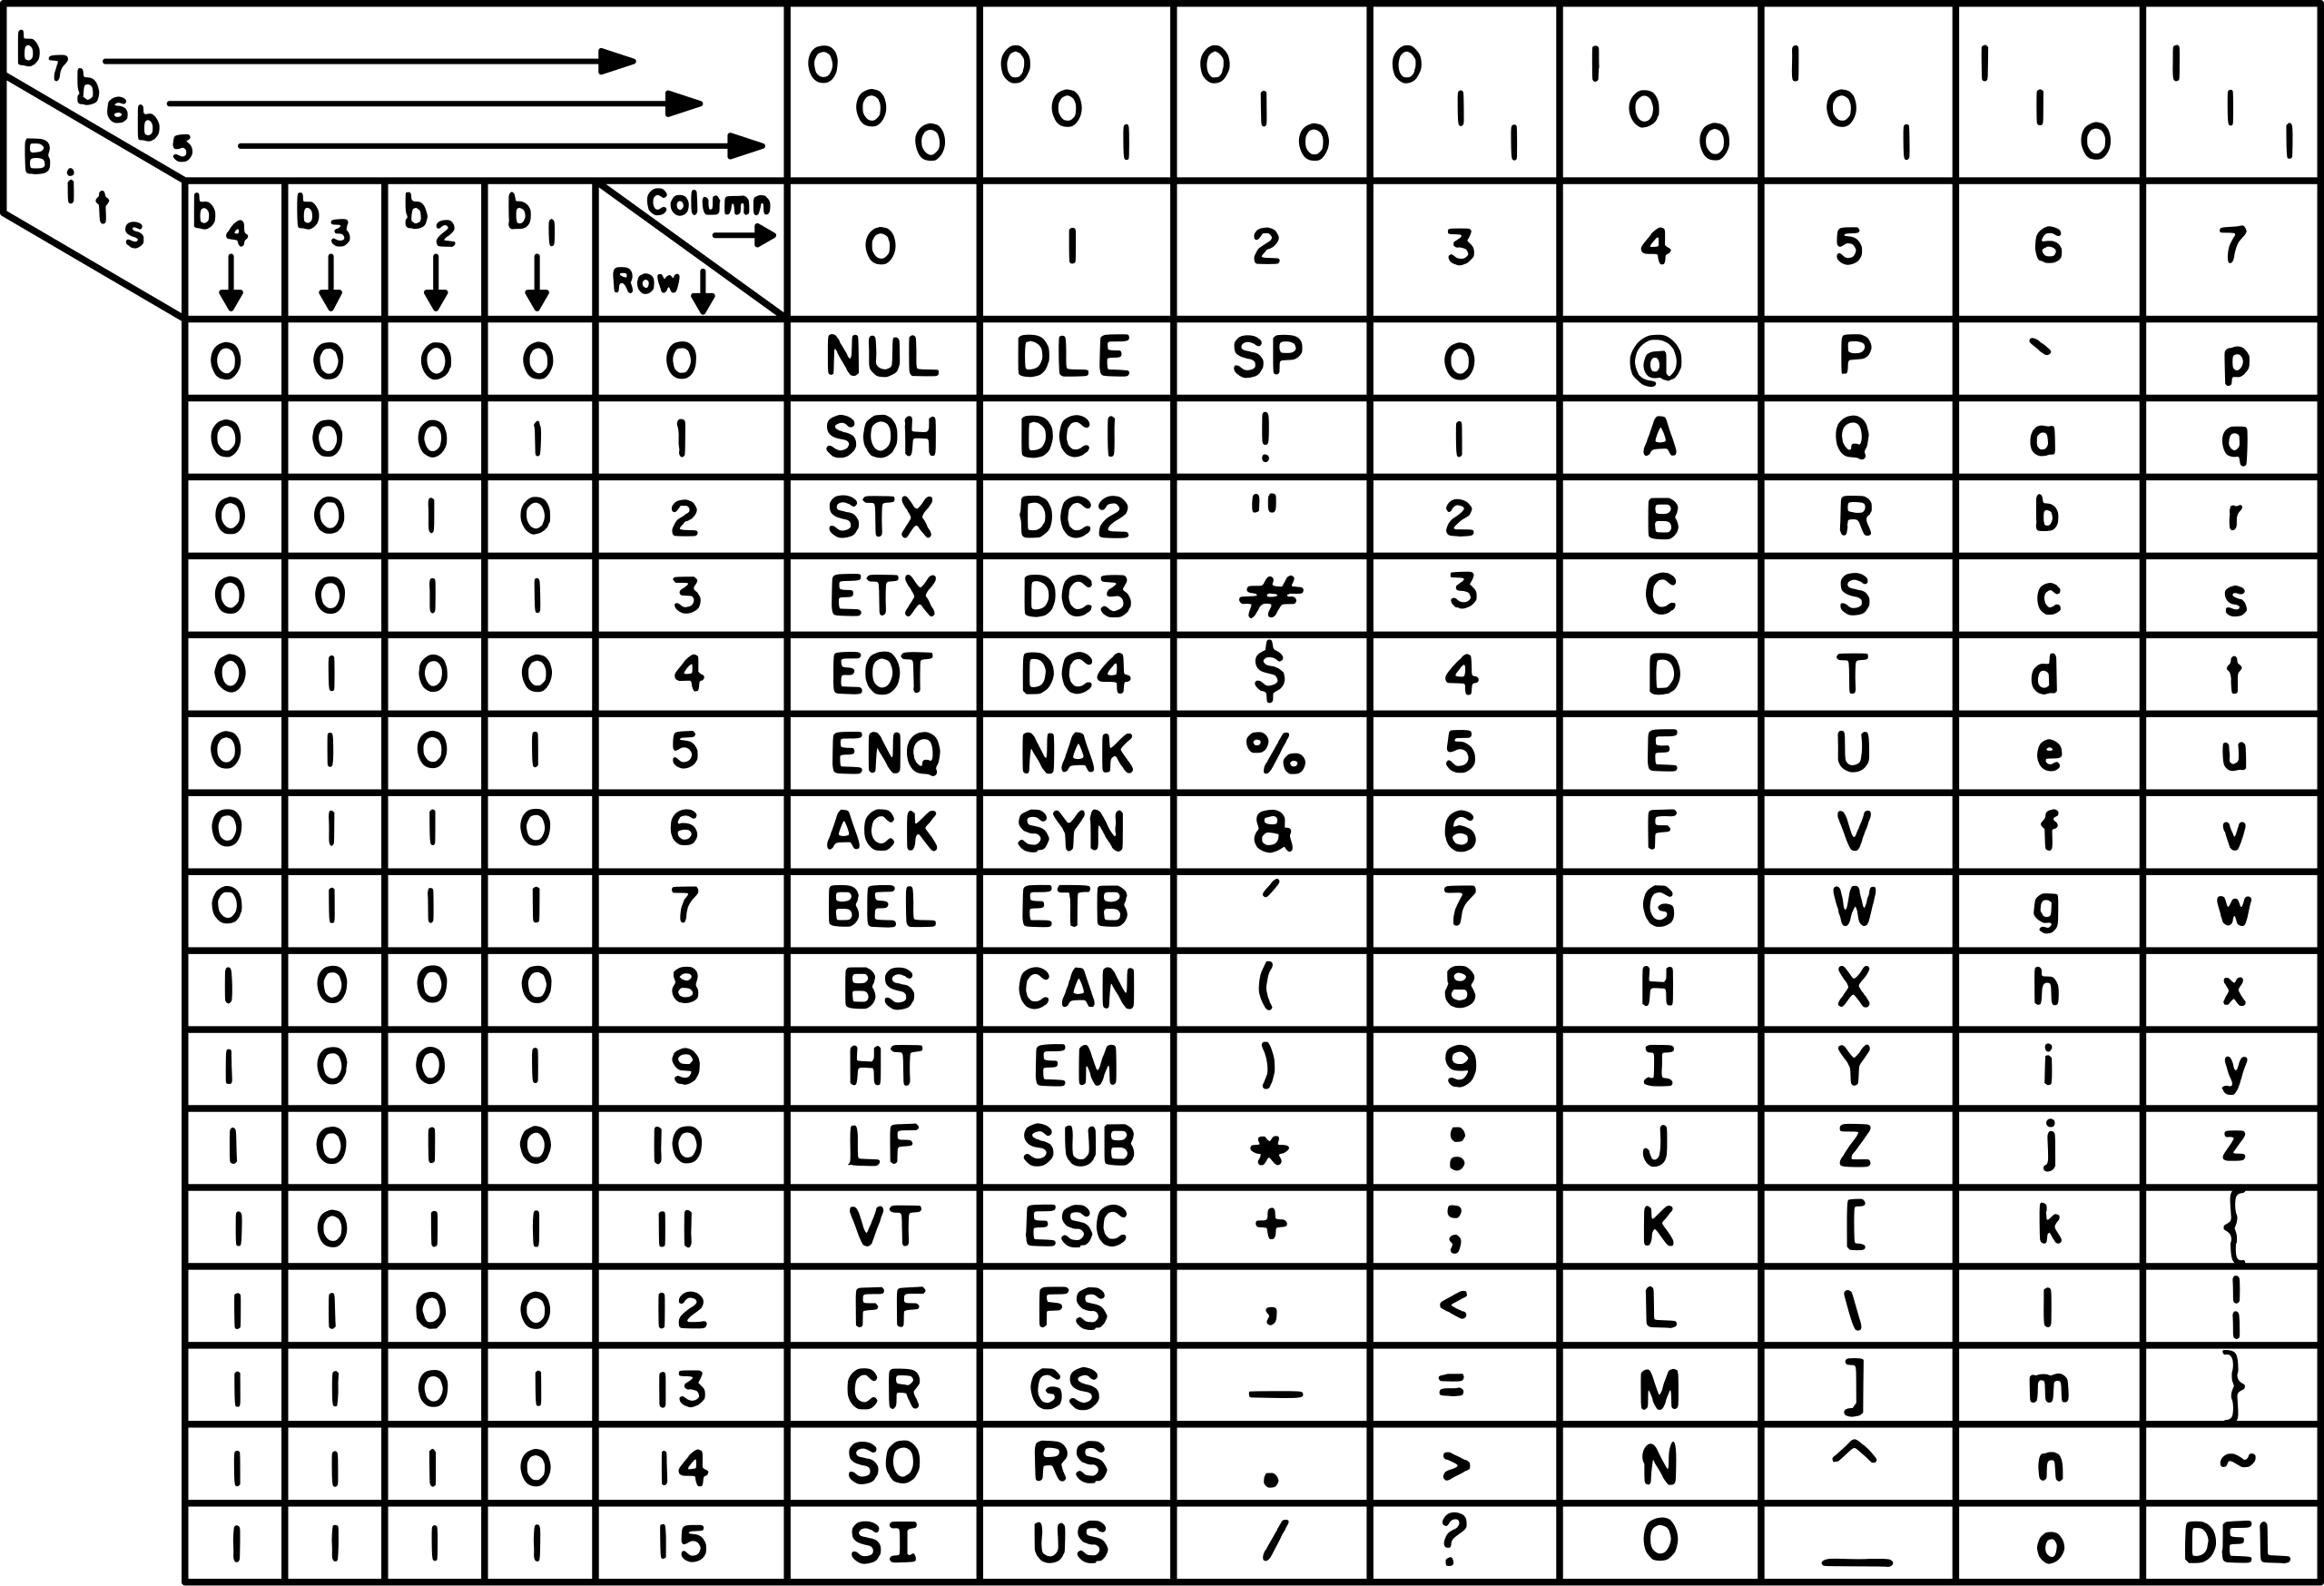



UTF-8 extends ASCII and has a dynamic size encoding (this means that some characters are 8 bits (1 byte) long, and some characters are 32 bits long). Thus, up to 1,112,064 different characters can be encoded in UTF-8. UTF-8 and ASCII are backward compatible, so if you have text encoded in ASCII, a UTF-8 reader can read it, but not in the opposite direction: not every UTF-8 encoded character sequence cannot be decoded by an ASCII reader.

Tips: in python internally in memory strings are stored in UTF-8 encoding by default

In [111]:
# You can make bytes sequences using hexadecimal and octal notation
print(b'\x41', type(b'\x41')) #hexadecimal notation. ASCII code for A is 65, so 65 = 4 * 16 + 1
print(b'\101', type(b'\101')) #octal notation 65 = 1 * 8**2 + 0 * 8**1 + 1 * 8**0
print('\u0041', type('\u0041')) #Unicode notation, which is also hexadecimal notation (but for string not bytes)

b'A' <class 'bytes'>
b'A' <class 'bytes'>
A <class 'str'>


Python print can display a sequence of bytes in a human-readable format, so it will display a decoded UTF-8 sequence, rather than a sequence of 0 and 1. If some byte print cannot decode, it will display this byte in hex format: '\xA2'

In [79]:
bytes_string = "some ASCII string".encode('ascii')
print(bytes_string)
print(''.join(format(byte, '08b') for byte in bytes_string)) # but we can see byte sequence
print(bytes_string + bytes([0b11001100]))

b'some ASCII string'
0111001101101111011011010110010100100000010000010101001101000011010010010100100100100000011100110111010001110010011010010110111001100111
b'some ASCII string\xcc'


In [ ]:
bin_sequence = b'\x68\x65\x6c\x6c\x6f\x20\x77\x6f\x72\x6c\x64'
print(bin_sequence.decode('ascii')) # you can also decode bytes to string
print(bin_sequence.decode('utf-8'))

hello world
hello world


In [117]:
emoji_bin_sequence = b'\xf0\x9f\x91\xba'
print(emoji_bin_sequence.decode('utf-8'))
print(emoji_bin_sequence.decode('ascii'))

👺


UnicodeDecodeError: 'ascii' codec can't decode byte 0xf0 in position 0: ordinal not in range(128)

In [ ]:
print(ord('∫')) # ord returns integer value, which binary representation is actually encoding of character
print(bin(55)) # bin prints integer as sequence of 0 and 1

print(bin(ord('A'))) #this symbol is encoded in one byte (because it is ASCII character)
print(bin(ord('👺'))) #this symbol is encoded in two bytes

8747
0b110111
0b1000001
0b11111010001111010


In [ ]:
#What will be printed?
print('\x41'.encode('utf-8'))
print('A'.encode('ascii'))
print('👺'.encode('utf-8'))
print('👺'.encode('ascii'))

b'A'
b'A'
b'\xf0\x9f\x91\xba'


UnicodeEncodeError: 'ascii' codec can't encode character '\U0001f47a' in position 0: ordinal not in range(128)

## **Data structures**

### **List**

In [ ]:
l1, l2, l3, l4 = list(), [], [0, 1, 2], [5]*4
print(l1, l2, l3, l4)

[] [] [0, 1, 2] [5, 5, 5, 5]


In [161]:
l1 = ['str', 3, 3.2, True, [3, 'str2']]
print(l1)
print(len(l1))
print(l1[2])
print(l1[-1])
print(len(l1[-1]))
print(l1[4][1])
print(l1[0:3:2])
print([1, 2] + [3, 4])
print([2, 3] * 4)
print(4 in [1, 4, 5])
print([3, "4"] in [3, "dfs", [3, "4"]])

['str', 3, 3.2, True, [3, 'str2']]
5
3.2
[3, 'str2']
2
str2
['str', 3.2]
[1, 2, 3, 4]
[2, 3, 2, 3, 2, 3, 2, 3]
True
True


In [140]:
l1 = [1, 2, 3]
l1.append(4)
print(l1)

l1 = [1, 2, 3]
l1 += [4]
print(l1)

l1 = [1, 2, 3, 4]
l1.pop()
print(l1)

l1 = [1, 2, 3, 4]
l1.pop(2)
print(l1)

[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3]
[1, 2, 4]


<div class="alert alert-danger">
    <b>Attention:</b> It is not recommended to use different types in the same list.
</div>

Lists that are not uniform in type can cause unexpected errors, which leads to the need for additional checks.

In [ ]:
from typing import Any

def func(l):
    if len(l) == 0:
        return None
    s = l[0]
    for element in l[1:]:
        s += element
    return s

print(func([0.5, 3, 3.9]))
print(func(["He", "ll", "o"]))

7.4
Hello


In [145]:
print(func([0.5, 3, "o"]))

TypeError: unsupported operand type(s) for +=: 'float' and 'str'

In [146]:
def func_safe(l):
    if len(l) == 0:
        return None
    s = l[0]
    for element in l[1:]:
        try:
            s += element
        except TypeError:
            return None
    return s

In [148]:
print(func_safe([0.5, 3, "o"]))

None


<div class="alert alert-info">
    <b>Advise:</b> Make sure that the lists do not self-loop, this can lead to very unexpected consequences.
</div>

In [150]:
tools = ['axe']
tools.append(tools)
print(tools[1][1][1])
tools[0] = 'pick' + tools[0]
print(tools[1][1][1])

['axe', [...]]
['pickaxe', [...]]


### **Tuple**

Tuples are immutable objects, so once they are created, no one can change them.

In [167]:
t1, t2, t3 = (1, 2, 3), (3, True, '32332344'), (1, list)
t4, t5 = tuple(), (4, )
print(t1 + t2) # we concat two tuples
print(t2 * 2) # we repeat tuple  
print(t2[:2]) # we can use slicing as in lists and strings

(1, 2, 3, 3, True, '32332344')
(3, True, '32332344', 3, True, '32332344')
(3, True)


In [183]:
t1[0] = 2

TypeError: 'tuple' object does not support item assignment

#### **Packing and unpacking**

In [ ]:
some_tuple = 42, "Gauss", sum #u pack several values in one tuple "some_tuple"

a, b, c = some_tuple
print(a, b, c)

a, *bc = some_tuple
print(a, bc)

*ab, c = some_tuple
print(ab, c)

first, second, *other, last= [1, 2, 3, 4 ,5] # u can also do starred unpacking with lists and strings!
print(first, second, other, last)

first, second, *other, last= "abcdefg"
print(first, second, other, last)

42 Gauss <built-in function sum>
42 ['Gauss', <built-in function sum>]
[42, 'Gauss'] <built-in function sum>
1 2 [3, 4] 5
a b ['c', 'd', 'e', 'f'] g


### **Dict**

A dictionary in Python is a collection of key-value pairs.
Keys must be unique and hashable.
Values can be anything.
Any object, which is hashable can be a key in dict

In [ ]:
import numpy
dict = {
    'Poincare': 42, 
    True: sum, #builtin method is hashable
    float: 1.13, #type is hashable
    (1, 2, 4): "40k", #tuple is hashable and immutable
    None: numpy #None is hashable and imported packages are also hashable
    }

print(dict[float]) # if there is no float key this code will fail
print(dict.keys())
print(dict.values())
print(dict.items())
print(dict.get(str, 4)) # if there is no str key .get() will return default value
del dict[float]
print(dict.get(float)) # we removed key float
print(True in dict) # we can check whether key exist in the dict
print(dict.pop(True)) # deletes a key, but returns a value


1.13
dict_keys(['Poincare', True, <class 'float'>, (1, 2, 4), None])
dict_values([42, <built-in function sum>, 1.13, 'dsd', <module 'numpy' from '/Users/m.akhtyrchenko/miniconda3/lib/python3.13/site-packages/numpy/__init__.py'>])
dict_items([('Poincare', 42), (True, <built-in function sum>), (<class 'float'>, 1.13), ((1, 2, 4), 'dsd'), (None, <module 'numpy' from '/Users/m.akhtyrchenko/miniconda3/lib/python3.13/site-packages/numpy/__init__.py'>)])
None
None
True
<built-in function sum>


In [ ]:
d = {1: 'a', True: 'b', 1.0: 'c'}
d

In [ ]:
dict = {
    [1, 2]: 42, # list is unhashable, so it cannot be dict key,
    {'k': 2}: 3 # dict is also unhashable, so it also cannot be dict key
}

TypeError: unhashable type: 'dict'

<div class="alert alert-info">
    <b>Advise:</b> straight adressing to dict via key is unsafe, use .get() method instead
</div>

<div class="alert alert-danger">
    <b>Attention:</b> It is not recommended to use different types in keys in the same dict.
</div>

Same reason as in list

### **Set**

A set is an unordered, mutable collection of unique elements.
No duplicate values. Useful for fast membership tests, removing duplicates, and performing set operations like union or intersection

In [ ]:
s1, s2 = set(), {42, "Dirak", float} # is not compatible with unhashable types
s2.add(None)
print(s2)
s2.remove(None)
s2.discard(True)
print(s2)

s1, s2 = {1, 2, 3, 4}, {2, 4, 6}
print(s1 | s2) # union
print(s1 & s2) # intersection
print(s1 - s2) # difference
print(s1 <= s2) # is subset or not

{<class 'float'>, 42, None, 'Dirak'}
{<class 'float'>, 42, 'Dirak'}
{1, 2, 3, 4, 6}
{2, 4}
{1, 3}
False


## **Control Flow**

### **If clause**

```python
if condition1:
    # block 1
elif condition2:
    # block 2
elif condition3:
    # block 3
    ...
else:
    # default block


In [ ]:
x = 3
if x > 0:
    print('Is greater than 0')
elif x < 0:
    print('Is less than 0')
elif x == 0:
    print('Is equal 0')
else:
    print(42)

<div class="alert alert-danger">
<b>Attention:</b> don't add redundant brackets, they reduce readability
</div>

In [ ]:
if (x > 0):
    print('Is greater than 0')
elif (x < 0):
    print('Is less than 0')
elif (x == 0):
    print('Is equal 0')
else:
    print(42)

<div class="alert alert-info ">
<b>Advice:</b> try to avoid excessive nesting, as it makes the code harder to read and understand.
</div>

<div class="alert alert-info ">
<b>Advice:</b> try to minimize the number of conditions to be checked and discard unnecessary checks
</div>

Task: check that x is not divisible by 2, 3, or 6

In [220]:
# Bad example 
def check_div(x):
    if x % 2 != 0:
        if x % 3 != 0:
            if x % 6 != 0:
                return True
            else:
                return False
        else:
            return False
    else:
        return False

In [ ]:
# Good example
def check_div(x):
    if not ((x % 2 == 0) or (x % 3 == 0)):
        return True
    return False

<div class="alert alert-info ">
<b>Advice:</b> try to avoid long if expressions. in such cases, algorithmize the check
</div>

Task: check whether character is upper or lower case

In [ ]:
# Very bad solution
def is_upper_case(char: str):
    if not isinstance(char, str) and len(char) != 1: # safecheck
        raise Exception('Incorrect input')
    if char == 'A':
        return True
    elif char == 'B':
        return True
    elif char == 'C':
        return True
    elif char == 'D':
        return True
    elif char == 'E':
        return True
    elif char == 'F':
        return True
    elif char == 'G':
        return True
    elif char == 'H':
        return True
    elif char == 'I':
        return True
    elif char == 'J':
        return True
    elif char == 'K':
        return True
    elif char == 'L':
        return True
    elif char == 'M':
        return True
    elif char == 'N':
        return True
    elif char == 'O':
        return True
    elif char == 'P':
        return True
    elif char == 'Q':
        return True
    elif char == 'R':
        return True
    elif char == 'S':
        return True
    elif char == 'T':
        return True
    elif char == 'U':
        return True
    elif char == 'V':
        return True
    elif char == 'W':
        return True
    elif char == 'X':
        return True
    elif char == 'Y':
        return True
    elif char == 'Z':
        return True
    else:
        return False

In [ ]:
#  straightforward solution
def is_upper_case(char: str):
    if not isinstance(char, str) and len(char) != 1: # safecheck
        raise Exception('Incorrect input')
    if char in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        return True
    else:
        return False

<div class="alert alert-info ">
<b>Advice:</b> before you try to implement something in python, make sure that there is no method that does what you want to do. In the vast majority of cases, he will do it faster than your implementation. Usually built in methods are faster
</div>

In [ ]:
#  good solution
def is_upper_case(char: str):
    if not isinstance(char, str) and len(char) != 1: # safecheck
        raise Exception('Incorrect input')
    return char.isupper()

In [ ]:
#  nerd solution
def is_upper_case(char: str):
    if not isinstance(char, str) and len(char) != 1: # safecheck
        raise Exception('Incorrect input')
    return 65 <= ord(char) <= 90

<div class="alert alert-danger">
<b>Attentions:</b> do not declare variables inside if branches that you will use outside the branch in which they were declared.
</div>

In [ ]:
# if x != 0 we will get undefined variable error
x = 1
if x == 0:
    d = 0
print(d)

NameError: name 'd' is not defined

In [243]:
x = 0
if x == 0:
    d = 0
print(d)

0


Ternary operator

In [237]:
x = 10
y = ("string 1" if x % 5 == 0 else "string 2") * 2
y

'string 1string 1'

<div class="alert alert-info">
<b>Advise:</b> do not use the ternary operator with long expressions, it reduces the readability of the code.
</div>

<div class="alert alert-info">
<b>Advise:</b> do not return different values of different types from the ternary operator depending on the condition.
</div>

In [245]:
x = 3
y = "string" if x > 0 else 0.5
print(y + 8.5)

TypeError: can only concatenate str (not "float") to str

### **For loop**
```python
for variable in iterable:
    # block that runs for each item
else:
    # optional block that runs if the loop completes normally (no break)

Lists, dicts, tuples, sets, strings are iterable (so u can iterate over them)

In [ ]:
for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]: # u can iterate over any iterable object
    print(n)

In [ ]:
rng = range(10)
print(type(rng))
print(rng[0], rng[-1])
print(rng[::-1]) # u can slice range (and slice will be another range)
print(rng[0:5:-2])
print(list(range(10)))
print(list(range(4, 14)))
print(list(range(4, 14, 3)))
print(list(range(14, 4, -2)))

<class 'range'>
0 9
range(9, -1, -1)
range(0, 5, -2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[4, 7, 10, 13]
[14, 12, 10, 8, 6]


So actually range doesn't store all numbers in memory.

In [257]:
rng = range(10**100)
rng[-100000]

9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999900000

Task: print alphabet in the forward and reverse order

In [266]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for character in alphabet:
    print(character, end=' ')
print('\n')
    
for character in alphabet[::-1]:
    print(character, end=' ')

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

Z Y X W V U T S R Q P O N M L K J I H G F E D C B A 

<div class="alert alert-info">
<b>Advise:</b> it is better to use the reversed method instead of [::-1] to improve readability.
</div>

In [267]:
for character in reversed(alphabet):
    print(character, end=' ')

Z Y X W V U T S R Q P O N M L K J I H G F E D C B A 

### **While loop**
```python
while condition:
    # block that runs while condition is True
else:
    # optional block that runs if the loop completes normally (no break)


In [ ]:
x = 17

while x != 1:
    
    if x % 2 == 0:
        x //= 2
    else:
        x = 3 * x + 1
        
    print(x)

In [ ]:
state = "s0"
# Example of finite state machine implemented using while loops
while state != "sF": 

    try:
        value = float(input())
    except:
        print("A non-float number was entered")
        continue

    match state:
        case "s0":
            state = "s1" if value > 2.1 else "s0"
            print(state, value * 2) 
        case "s1":
            state = "s0" if value > 1.5 else "s2"
            print(state, value * 1.5)
        case "s2":
            state = "s0" if value > 3.1 else "sF"
            print(state, value * 1.0)
        case _:
            raise Exception("Unpredictable behavior, program crash")
else:
    print("The operation of the finite state machine has ended")

s1 6.8
s2 1.5
sF 1.0


<div class="alert alert-info">
    <b>Advise:</b> use <b>for</b> when you need to work with elements sequentially and independently of each other
</div>

In [ ]:
data = [10, 20, 30, 40]

print("For each item from the list, print it")

for value in data:
    print(value, end=', ')

print()
print("For each item from the list, print a pair: (sequence number, element)")

for i, value in enumerate(data):
    # enumerate maps data objects into tuples (index, object)
    print(i, value, end=', ')

print()
print("For each item from the list, print its index")

for i in range(len(data)):
    print(i, end=', ')

<div class="alert alert-danger">
<b>Attention:</b> don't change the object that the for loop is currently running on. This may lead to unexpected behavior for you.
</div>

In [ ]:
data = [0,1,2,3,4,5,6,7,8,9,10]

def f(data):
    data.append(3)

for value in data:
    print(value, end=', ')
    f(data)
    # We might get stuck in an infinite loop.


<div class="alert alert-info">
<b>Advice: </b>use <b>while</b> if the list changes at each iteration, if it is difficult to predict the number of iterations in advance.
</div>

In [ ]:
data = [0,1,2,3,4,5,6,7,8,9,10]

while data:
    value = data.pop(0)
    print(value, end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

### **Collections comprehensions**

- List comprehension: 
```python 
[x for x in iterable]
```
- Dict comprehension: 
```python 
{k: x for k, x in iterable}
```
- Set comprehension: 
```python 
{x for x in iterable}
```

In [17]:
print( [x * x for x in range(8)] ) 
print( [x * x for x in range(8) if x % 2 == 0] ) # we can filter values, which we want to leave
print({word: len(word) for word in ["pine", "apple", "pineapple"] if len(word) < 6 })
print({len(word) for word in ["pine", "apple", "pineapple"]})

[0, 1, 4, 9, 16, 25, 36, 49]
[0, 4, 16, 36]
{'pine': 4, 'apple': 5}
{9, 4, 5}


<div class="alert alert-info">
<b>Advise: </b> It is not recommended to make long filtering conditions or complex expressions for the elements of the new collection, this worsens the readability of the code. If the conversion is too long, then wrap it in a function and call it.
</div>

In [ ]:
from math import exp
#Bad example

[x for x in range(100) if x % 2 == 0 if x % 3 == 0 if x % 6 == 0]
[2 *  6.62 * 3**2 / (w**5) * (exp(19.79 / (w * 1.38 * T)) - 1) for w, T in zip(range(100), range(273, 373))]

#Good example

def is_divided(x):
    return (x % 2 == 0) or (x % 3 == 0)


def large_formula(w, T):
    return 2 *  6.62 * 3**2 / (w**5) * (exp(19.79 / (w * 1.38 * T)) - 1)


[x for x in range(100) if is_divided(x)]
[large_formula for w, T in zip(range(100), range(273, 373))]


Nested comprehension is allowed 

In [24]:
tensor_3d = [[[0, 1, 2], [1, 2, 3], [2, 3, 4]], [[3, 4, 5], [3, 4, 5], [4, 5, 6]], [[6, 7, 8], [7, 8, 9], [8, 9, 10]]]
[elem**2 for matrix in tensor_3d for row in matrix for elem in row if elem % 2 == 0]

[0, 4, 4, 4, 16, 16, 16, 16, 36, 36, 64, 64, 64, 100]

<div class="alert alert-info">
<b>Advise: </b> if possible, avoid nested comprehension, as this reduces the readability of the code.
</div>

### **Break, continue**

In [290]:
emails = ["strassen@dot.mul", "invalid", "cat@in.box"]

for email in emails:
    if "@" not in email:
        print("First invalid email found:", email)
        break
else:
    print('All emails are correct')

First invalid email found: invalid


In [ ]:
count = 0
while count < 5:
    value = input("Enter a number: ")
    if not value.isdigit():
        print("Not a number, skipping.")
        continue
    print("Squared:", int(value) ** 2)
    count += 1

In [ ]:
while True:
    pwd = input("Enter password: ")
    if pwd == "secret":
        print("Access granted")
        break
    print("Wrong password, try again.")

try catch + continue and break

In [ ]:
while True:
    try:
        print("Try block")
        break
    finally:
        print("Finally block")

Try block
Finally block


In [298]:
for i in range(3):
    try:
        continue
    finally:
        print("In finally")
    print("In for loop")

In finally
In finally
In finally


In [ ]:
def cursed():
    for i in range(3):
        try:
            break
        finally:
            return "finally won"
        
print(cursed()) 

## **Functions**

Function in python can be used in several ways:

In [ ]:
from math import exp

# here we use return Value
def sigmoid(x):
    """
    sigmoid(x) = \\frac{1}{1+e^{-x}}
    """
    return 1 / (1 + exp(-x))

sigmoid(2.3)

Side effect refers to any change in a program's state that is observable outside of the function or operation that caused it, beyond simply returning a value

In [ ]:
from random import randint

# here we use function side effect
def steal_value(l: list):
    selected_index = randint(0, len(l))
    l.pop(selected_index)

l = [0, 2, 4, 5]
steal_value(l)
l

[2, 4, 5]

<div class="alert alert-danger">
<b>Attention: </b> Side effects can be very dangerous and can lead to difficult-to-detect bugs that occur at the runtime stage. Therefore, it is worth taking great care when writing functions with side effects.
</div>

In [ ]:
config = {"debug": False} #configuration for out program

def this_function_we_dont_want_to_verbose():
    #...
    if config["debug"]:
        print('...')
        #do smthing
    #...

def do_some_stuff():
    # we have changed the global variable to log all actions in this particular function, thinking that 
    # at the end of the function call we would not forget to return it back 
    # (spoiler alert: we forgot)
    config["debug"] = True
    #100 lines of code with calling other functions, which use config["debug"]

do_some_stuff()

this_function_we_dont_want_to_verbose() # but it turned out that it verbose

It is worth noting that there are also fairly safe side effects, for example, a method that displays information on the screen in a special format is also a method with a side effect.

In [36]:
from typing import Dict
import psutil


def log_cpu_state(stats: Dict[str, str]):
    if any(not (key in stats) for key in ('cpu_load', 'ram_load', 'cpu_frequency')):
        return
    print("📊 System Load:")
    print(f"• CPU Load: {stats['cpu_load']}%")
    print(f"• CPU Frequency: {stats['cpu_frequency']} Mhz")
    print(f"• RAM Load: {stats['ram_load']}%")

stats = {
    'cpu_frequency': psutil.cpu_freq().current,
    'cpu_load': psutil.cpu_percent(),
    'ram_load': psutil.virtual_memory().percent
}

log_cpu_state(stats)

📊 System Load:
• CPU Load: 22.8%
• CPU Frequency: 3504 Mhz
• RAM Load: 79.7%


### **Scoping**

When we declare

In [ ]:
# Each time we call in recursion `fibonacci` function we create copy of n in new scope, which we need to store until all nested function calls finish
n = -100
def fibonacci(n):
    print(n, id(n)) # 
    if n <= 1:
        return 1
    fibonacci_n = fibonacci(n-1) + fibonacci(n-2)
    print(id(fibonacci_n))
    return fibonacci_n

fibonacci(5)
print('n outside loop:', n)

5 4340886208
4 4340886176
3 4340886144
2 4340886112
1 4340886080
0 4340886048
4340886112
1 4340886080
4340886144
2 4340886112
1 4340886080
0 4340886048
4340886112
4340886208
3 4340886144
2 4340886112
1 4340886080
0 4340886048
4340886112
1 4340886080
4340886144
4340886304
n outside loop: -100


Also you can create function, which is a "factory" for other functions. This is often useful if there is a set of arguments that are the same for multiple function calls. Therefore, instead of explicitly writing this set of arguments each time, you can pass them 1 time through the context of the factory function.

In [4]:
from random import uniform
from math import log, cos, pi

def normal_distribution_sampler_factory(mu, sigma):

    def normal_distribution_sampler(size):
        R_array = [(-2 * log(uniform(0, 1))) ** 0.5  for i in range(size)]
        theta_array = [2 * pi * uniform(0, 1) for i in range(size)]
        return [sigma * R * cos(theta) + mu for R, theta in zip(R_array, theta_array)]
    
    return normal_distribution_sampler

When calling a method, some parameters can be specified by their position in the function header (they are called **positional**), and others by their name (they are called **keyword**).

In [ ]:
def integrate_rectangular(func, a, b, step_size=1e-5): # using param=value you can set the default value 
    integral_sum = 0
    for step in range(0, int((b - a) / step_size)):
        d = a + step * step_size
        integral_sum += func(d) * step_size
    return integral_sum

#we can pass functions as arguments to another functions (function is also an object and has hash)
print(integrate_rectangular(sigmoid, 0, 1)) # we don't have to specify parameters with default values
print(integrate_rectangular(sigmoid, 0, 1, 1e-3))
print(integrate_rectangular(sigmoid, b=1, a=0))

0.6201060410988148
0.6199989732199573
0.6201060410988148


In [ ]:
integrate(sigmoid, b=1, 0) # positional parameters should always come before keyword ones

SyntaxError: positional argument follows keyword argument (3175899678.py, line 1)

Using keywords `/` and `*` we can specify explicitly which parameters can be specified only as positional, and which ones only as keyword

In [ ]:
def integrate_trapezoid(func, /, a, b, *, step_size=1e-5): # all parameters before `/` are positional-only and all parameters after `*` are keyword-only
    integral_sum = 0
    for step in range(0, int((b - a) / step_size)):
        d_left = a + step * step_size
        d_right = a + (step+1) * step_size
        integral_sum += (func(d_right) + func(d_left)) / 2 * step_size 
    return integral_sum

integrate_trapezoid(sigmoid, 0, 1)

0.6201071963818814

In [50]:
integrate_trapezoid(func=sigmoid, a=0, b=1)

TypeError: integrate_trapezoid() got some positional-only arguments passed as keyword arguments: 'func'

In [51]:
integrate_trapezoid(sigmoid, 0, 1, 1e-6)

TypeError: integrate_trapezoid() takes 3 positional arguments but 4 were given

### **Varargs (\*args) and kwargs (\*\*kwargs)**

- `*args`	keyword collects positional arguments into a tuple
- `**kwargs` keyword collects keyword arguments into a dict

In [ ]:
def reduce(start_value, *args, **operations):
    results = {name: start_value for name in operations}
    for value in args:
        for name, func in operations.items():
            results[name] = func(results[name], value)
    return results

def custom_func(self, other):
    return 5 * self + 1 if self % other == 0 else self // other

reduce(0, 1, -1, 3, 4, max=max, custom_func=custom_func)

{'max': 4, 'custom_func': 7}

When to use?

In [30]:
def wrapper(func): #Wrapping functions and forwarding arguments

    def inner_function(*args, **kwargs):
        print('Execution starts...')
        return func(*args, **kwargs)
    
    return inner_function

wrapper(max)(1, 0)

Execution starts...


1

In [ ]:
#bad case
def print_args_kwargs(*args, **kwargs):
    args += (1,)
    kwargs['x'] = 42
    print(args, kwargs)

print_args_kwargs(1, 2, 3, x=10)

(1, 2, 3, 1) {'x': 42}


<div class="alert alert-danger">
<b>Attention: </b> modifying *args and **kwargs variables is a bad practice and can lead to unexpected errors.
</div>

<div class="alert alert-danger">
<b>Attention: </b> do not add *args and **kwargs where it is unreasonable. Adding and using implicitly declared variables in the logic of a function greatly impairs the readability of the code
</div>

In [ ]:
# bad case
def calculate(*args, **kwargs):
    if 'a' in kwargs and 'b' in kwargs:
        return kwargs['a'] + kwargs['b']
    elif len(args) >= 2:
        return args[0] + args[1]
    else:
        return None

<div class="alert alert-danger">
<b>Attention: </b> if you add *args and **kwargs, do not forget to take into account corner cases when, for example, they may be empty.
</div>


In [35]:
# bad case
def log_event(*args, **kwargs):
    print("Event:", args[0])
    print("Details:", kwargs['details'])
    
log_event("Fatal error")

Event: Fatal error


KeyError: 'details'

## **None and a bit about data structure** 

None is a special **object** (not a value) of type NoneType, which represents the absence of a value

In [305]:
print(type(None))
print(bool(None), str(None))

<class 'NoneType'>
False None


How to check if variable`s value is None?

In [307]:
x = None
print(x is None)
print(x == None)

True
True


<div class="alert alert-info">
<b>What is the difference between `is` and `==`?</b>

In Python, any variable is actually a reference (or pointer) to an object stored in memory. Some objects are immutable, such as integers, strings, and tuples. This means that when you try to "change" them, Python doesn't modify the object in place — instead, it creates a new object and makes the variable point to it. Other objects are mutable, like lists, dictionaries, and sets. When you modify these, Python changes the original object in place without creating a new one. So, assignment always passes a reference, but whether a change affects the original object depends on its mutability.

</div>



Using method `id()` we can actually see unique object adress. So `a is b` checks whether a and b is a pointer on same object or not. But `==` actually checks whether values stored in memory are the same

In [ ]:
a = 1.2
b = a
assert id(a) == id(b) # we can replace with construction `a is b`

b = 1.2
assert not (a is b) # b is not same object as a
assert a == b # but the value the store is the same

b = a
a += 1
assert not (a is b) # changing object causes new object creation
print(a, b)


2.2 1.2


The main problem with `x == None` is that we can redefine `==` operator for custom objects (It will be in a few classes).

`None` is a singleton object, that means, it's the **only one in the entire program**. Therefore, all variables with the value `None` actually point to the same object in memory (the `id()` for all of them will give the same value.)

In [ ]:
class customType:
    def __eq__(self, other): # redefine behaviour of `==` operator
        return True  # always returns True!
    
x = customType()
print(x == None)
print(x is None)

True
False


So, it is better to use `is`

## **Copy and Deepcopy**

In Python, `copy.copy()` creates a shallow copy of an object, that means it duplicates the outer structure but still references the same inner objects. On the other hand, `copy.deepcopy()` creates a deep copy, recursively copying everything, including nested objects (if they are mutable). This makes deepcopy safer when working with complex, nested data structures that you want to modify independently.

In [127]:
import copy
x = "some string"
y = copy.copy(x) # so actually copy do nothing, because string is immutable
print(x is y)
y = copy.deepcopy(x) # same for deepcopy
print(x is y)

True
True


In [ ]:
import copy
x = [1, 1, 2, [3, 5, 8], 'Euler', sum]
y = copy.copy(x) # so actually copy do nothing, because string is immutable
print(x is y, x[3] is y[3]) # actually copy only top level values 

x[3].append('Oops')
print(x, y, sep='\n')

x = [1, 1.0, 2, [3, 5, 8], 'Euler', sum]
y = copy.deepcopy(x) # do 'honest' copy with all nested objects
print(x is y)

print(x is y, x[3] is y[3], x[0] is y[0])

x[3].append('Oops')
print(x, y, sep='\n')

False True
[1, 1, 2, [3, 5, 8, 'Oops'], 'Euler', <built-in function sum>]
[1, 1, 2, [3, 5, 8, 'Oops'], 'Euler', <built-in function sum>]
False
False False True
[1, 1.0, 2, [3, 5, 8, 'Oops'], 'Euler', <built-in function sum>]
[1, 1.0, 2, [3, 5, 8], 'Euler', <built-in function sum>]


In [ ]:
a = [0]
a.append(a)
print(a, a is a[1])

In [149]:
#What will be printed?
b = copy.copy(a)
print("copy: ", a is b, a[1] is b[1], a is b[1])

b = copy.deepcopy(a)
print("deepcopy: ", a is b, a[1] is b[1], a is b[1])

copy:  False True False
deepcopy:  False False False


In [150]:
#What will be printed?
a = [[]] * 3
b = copy.copy(a)
a[0].append('👻')

print("a:", a)
print("b:", b)

a: [['👻'], ['👻'], ['👻']]
b: [['👻'], ['👻'], ['👻']]


Deepcopy is usually slower and may have issues with certain objects like file handles or recursive references (though it tries to handle those).

<div class="alert alert-info">
<b>Advice: </b> Do not make copies of objects unnecessarily. Copying is an expensive operation in terms of resources, especially if we talk about deep copying. Try to reuse existing structures.
</div>

## **📦 Python Modules and Packages**

Let's create our first python package

In [1]:
%%writefile module.py

import numpy as np
print('This code will be printed, when we import module or run it as a script')

def softmax(x: np.ndarray) -> np.ndarray:
    """
    Applies the softmax function to the input array.

    Parameters
    ----------
    x : np.ndarray
        Input array.

    Returns
    -------
    np.ndarray
        Softmax-transformed array.
    """
    x_exp = np.exp(x)
    return x_exp / x_exp.sum()

if __name__ == "__main__":
    print(f"Run in main: {softmax(np.array([1, 2, 3]))}")

Overwriting module.py


In [2]:
import module

This code will be printed, when we import module or run it as a script


When we try to import the module a second time, it will not be imported again, the old one will be used instead (despite the fact that we may have made some changes to module.py)

In [3]:
import module

In [ ]:
import numpy as np
module.softmax(np.array([2, 3, 4]))

NameError: name 'np' is not defined

All object defined in module are isolated. Therefore, if we locally declared some variable with the same name as in the module, there will be no conflict.

In [6]:
import numpy as np
module.softmax(np.array([2, 3, 4]))

array([0.09003057, 0.24472847, 0.66524096])

There is special variable `__name__`, which is built-in python variable that tells you how a python file is being used — either as a script or as a module imported somewhere else.

In [7]:
# So if you want to run some code in module, only if it is launched as a script you can add
if __name__ == "__main__":
    # Some code, that you need to run 
    pass

In [8]:
!python module.py

This code will be printed, when we import module or run it as a script
Run in main: [0.09003057 0.24472847 0.66524096]


Using `dir()` you can see what objects is defined inside module

In [13]:
dir(module)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'np',
 'softmax']

You can group multiple modules into packages, and you can also create packages within other packages (nested packages).

In [ ]:
! mkdir package
! mkdir package/inner
! cp module.py package/inner/module.py

A directory is recognized as a package if it contains an `__init__.py` file. This file can be empty or contain initialization code for the package. (In Python 3.3 and later, implicit namespace packages are also supported, allowing directories without `__init__.py` to be treated as packages under certain conditions, but we won't cover them)

In [21]:
! echo "print('This is code inside package/__init__.py')"> package/__init__.py
! echo "print('This is code inside package/inner/__init__.py')"> package/inner/__init__.py # in each subpackage, you also need to create __init__.py file

In [ ]:
import package

This is code inside package/inner/__init__.py


In [3]:
import package.inner

You can use the keyword `as` to change the name of the module, package, or object inside the module.

In [2]:
import package.inner.module as some_module 

You can use keyword `from` to import specific objects from module directly

In [1]:
import numpy as np

from package.inner.module import softmax as Softmax

Softmax(np.array([5, 6, 7]))

This is code inside package/__init__.py
This is code inside package/inner/__init__.py
This code will be printed, when we import module or run it as a script


array([0.09003057, 0.24472847, 0.66524096])

If you want to import all objects or modules from package or module, you can use `*`

In [4]:
import numpy as np

from package.inner import *

module.softmax(np.array([5, 6, 7]))

NameError: name 'module' is not defined

In [5]:
%%writefile package/inner/__init__.py

from module import softmax as Softmax
import module

Overwriting package/inner/__init__.py


In [3]:
import numpy as np

from package.inner import *

print(module.softmax(np.array([5, 6, 7])))
print(Softmax(np.array([5, 6, 7])))

[0.09003057 0.24472847 0.66524096]
[0.09003057 0.24472847 0.66524096]


<div class="alert alert-info">
<b>Advice: </b> avoid importing using `*`, this makes the code less understandable (since it is unclear exactly which modules and objects are in the current scope and you have to look at which objects are declared in the module being imported via *). Also, importing all objects for large packages can significantly slow down the program startup.
</div>



There is a package repository from which you can download almost any necessary package: https://pypi.org

In [4]:
! pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 6.6 MB/s eta 0:00:00 0:00:01


In [10]:
%%writefile requirements.txt

numpy
pandas>=2.2.0
requests<3.0
scikit-learn>=1.5.0
matplotlib~=3.9.0

Overwriting requirements.txt


You can install packages from file

In [11]:
! pip install -r requirements.txt

  Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 7.5 MB/s eta 0:00:0000:0100:01
Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_arm64.whl (20.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.3
    Uninstalling matplotlib-3.10.3:
      Successfully uninstalled matplotlib-3.10.3


In [12]:
import pandas as pd
pd.__version__

'2.3.1'

# How to write readable and maintainable code?

## Naming, typing and docstring

Here is bad code example of dijkstra algorithm implementation

In [ ]:
import heapq as h

def d(g,s):
    q=[]; h.heappush(q,(0,s))
    v={s:0}
    p={}
    while q:
        c,n=h.heappop(q)
        if c>v[n]:continue
        for a,b in g.get(n,[]):
            d=c+b
            if a not in v or d<v[a]:
                v[a]=d
                p[a]=n
                h.heappush(q,(d,a))
    return v,p

<div class="alert alert-success">
  <b>Advise:</b> you should use understandable and interpretable function and variable names
</div>

In [ ]:
import heapq

def dijkstra(graph, start_node):
    priority_queue = []
    heapq.heappush(priority_queue, (0, start_node))
    distances = {start_node: 0}
    previous_nodes = {}
    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)
        if current_cost > distances[current_node]:
            continue
        for neighbor, weight in graph.get(current_node, []):
            new_cost = current_cost + weight
            if neighbor not in distances or new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))
    return distances, previous_nodes

Sometimes, even with clear names of variables and functions, it can be difficult to understand what the code is doing (especially if it's about the code of some algorithm)

<div class="alert alert-success">
  <b>Advise:</b> it is a good practice to add comments to your code especially, when we are talking about algorithm code
</div>

<div class="alert alert-info">
  <b>Comment:</b> in real life, when developing production code, much fewer comments are used, but when creating libraries, especially those implementing some complex algorithms, the complexity increases for the same number of lines of code, so there is a need for comments. 
</div>

In [ ]:
import heapq

def dijkstra(graph, start_node):
    # Priority queue to hold (cost, node)
    priority_queue = []
    heapq.heappush(priority_queue, (0, start_node))
    # Dictionary to track the shortest distance to each node
    distances = {start_node: 0}
    # Dictionary to track the previous node in the shortest path
    previous_nodes = {}
    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)
        # Skip if we've already found a better path
        if current_cost > distances[current_node]:
            continue
        # Check neighbors of the current node
        for neighbor, weight in graph.get(current_node, []):
            new_cost = current_cost + weight
            # If this path to neighbor is better, update it
            if neighbor not in distances or new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))
    return distances, previous_nodes

But even with comments and a clear function name, it can be difficult to understand what the function expects to receive as input and what it returns.

<div class="alert alert-success">
  <b>Advise:</b> add type annotations, especially where complex nested structures are used.
</div>

In [ ]:
from typing import Any, Dict

def dijkstra(
    graph: dict[Any, list[tuple[Any, float]]],
    start_node: Any
) -> tuple[dict[Any, float], dict[Any, Any]]:
    # Priority queue to hold (cost, node)
    priority_queue : list[tuple[float, Any]] = []
    heapq.heappush(priority_queue, (0, start_node))
    # Dictionary to track the shortest distance to each node
    distances = {start_node: 0}
    # Dictionary to track the previous node in the shortest path
    previous_nodes: dict[Any, Any]  = {}
    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)
        # Skip if we've already found a better path
        if current_cost > distances[current_node]:
            continue
        # Check neighbors of the current node
        for neighbor, weight in graph.get(current_node, []):
            new_cost = current_cost + weight
            # If this path to neighbor is better, update it
            if neighbor not in distances or new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))
    return distances, previous_nodes

<div class="alert alert-success">
  <b>Advise:</b> so that other people can understand what the function does without reading the code, add a description of the method using docstring.
</div>

In [2]:
from typing import Any

def dijkstra(
    graph: dict[Any, list[tuple[Any, float]]],
    start_node: Any
) -> tuple[dict[Any, float], dict[Any, Any]]:
    """
    Compute the shortest paths from a start node to all other nodes using Dijkstra's algorithm.
    
    Parameters:
    graph (Dict[Any, List[Tuple[Any, float]]]): 
        A graph represented as an adjacency list. Each key is a node, and each value 
        is a list of (neighbor, weight) pairs.
    start_node (Any): 
        The node from which to start the search.

    Returns:
    Tuple[Dict[Any, float], Dict[Any, Any]]:
        - A dictionary mapping each reachable node to its minimum distance from the start node.
        - A dictionary mapping each node to the previous node on its shortest path.
    """
    # Priority queue to hold (cost, node)
    priority_queue : list[tuple[float, Any]] = []
    heapq.heappush(priority_queue, (0, start_node))
    # Dictionary to track the shortest distance to each node
    distances = {start_node: 0}
    # Dictionary to track the previous node in the shortest path
    previous_nodes: dict[Any, Any]  = {}
    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)
        # Skip if we've already found a better path
        if current_cost > distances[current_node]:
            continue
        # Check neighbors of the current node
        for neighbor, weight in graph.get(current_node, []):
            new_cost = current_cost + weight
            # If this path to neighbor is better, update it
            if neighbor not in distances or new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))
    return distances, previous_nodes

In [3]:
help(dijkstra)

Help on function dijkstra in module __main__:

dijkstra(
    graph: dict[typing.Any, list[tuple[typing.Any, float]]],
    start_node: Any
) -> tuple[dict[typing.Any, float], dict[typing.Any, typing.Any]]
    Compute the shortest paths from a start node to all other nodes using Dijkstra's algorithm.

    Parameters:
    graph (Dict[Any, List[Tuple[Any, float]]]):
        A graph represented as an adjacency list. Each key is a node, and each value
        is a list of (neighbor, weight) pairs.
    start_node (Any):
        The node from which to start the search.

    Returns:
    Tuple[Dict[Any, float], Dict[Any, Any]]:
        - A dictionary mapping each reachable node to its minimum distance from the start node.
        - A dictionary mapping each node to the previous node on its shortest path.



## PEP8

PEP 8 is the style guide for Python code. It helps developers write readable, consistent code.

### Common style guide rules

Indentation: 4 spaces

In [ ]:
# Wrong
def greet(name):
  print("Hello,", name)  # only 2 spaces (you can adjust the tab number and width in the settings of your code editor (IDE))

# Correct
def greet(name):
    print("Hello,", name)

Line Length: max 79 characters

In [ ]:
# Wrong
msg = "What determines the fate of humanity in this world? A certain invisible being or law, like the Hand of God hovering over the world? At least it is true that man is not even in control of his own will"

#Correct
msg = ("What determines the fate of humanity in this world? "
       "A certain invisible being or law, like the Hand of God hovering over the "
       "world? At least it is true that man is not even in control of his own will")

Blank lines between functions and classes

In [ ]:
# Wrong
def foo():
    pass
def bar():
    pass

# Correct
def foo():
    pass
# two blank lines

def bar():
    pass


Spaces around operators

In [ ]:
# Wrong
pineapple="pine"+"apple"

#Correct
pineapple = "pine" + "apple"

Naming conventions:
- Functions, variables: snake_case
- Classes: CamelCase
- Constants: UPPER_CASE

In [ ]:
PHI = 1.6180339887

def calculate_fibonacci(n):
    return round((PHI ** n - (-PHI) ** -n) / 5 ** 0.5)

class Prime:
    pass

### Automatic verification

You can automatically check your python code inside the file.py for compliance with the PEP8 standard using the flake8 package

In [17]:
!pip install flake8

In [ ]:
!flake8 code.py

If u are working in Jupyter notebook u can use special extension

In [18]:
%%writefile code.py
x=1+2
print( x )

Writing code.py


In [19]:
!flake8 code.py

code.py:1:2: E225 missing whitespace around operator
code.py:2:7: E201 whitespace after '('
code.py:2:9: E202 whitespace before ')'


### **Some practice**

https://cleanpygame.web.app/join/36D4M47M